# Project Canary: Policy Momentum Visualization

This notebook creates visual representations of the Policy Momentum Score to identify emerging energy policy trends.

## Visualization Goals
- Display time-series trends of the Policy Momentum Score
- Highlight alert periods where momentum is accelerating
- Compare actual scores against rolling average baseline
- Demonstrate insights that could feed into a future dashboard

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Policy Momentum Score Data

Load the calculated scores from the previous notebook.

In [23]:
# Load policy momentum score data
df = pd.read_csv('../data/policy_momentum_score.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Display basic info
print(f"✓ Loaded {len(df)} months of data")
print(f"  Date range: {df['date'].min().strftime('%Y-%m')} to {df['date'].max().strftime('%Y-%m')}")
print(f"  Alert count: {df['alert'].sum()} months")
print(f"  Score range: {df['policy_momentum_score'].min():.3f} to {df['policy_momentum_score'].max():.3f}")

df.head()

✓ Loaded 13 months of data
  Date range: 2024-10 to 2025-10
  Alert count: 4 months
  Score range: 0.020 to 0.422


,date,money_norm,people_norm,paper_norm,policy_momentum_score,rolling_avg_3m,alert
0,2024-10-01,0.000000,0.0,0.400000,0.120000,0.120000,False
1,2024-11-01,0.000000,0.0,0.066667,0.020000,0.070000,False
2,2024-12-01,0.000401,0.0,0.466667,0.140161,0.093387,True
3,2025-01-01,0.417111,0.0,0.466667,0.306845,0.155668,True
4,2025-02-01,0.000531,0.0,0.200000,0.060212,0.169072,False


## 2. Main Visualization: Policy Momentum Over Time

Create a comprehensive time-series chart showing:
- Policy Momentum Score (solid blue line)
- 3-month rolling average (dashed orange line)
- Alert periods (red shaded regions)

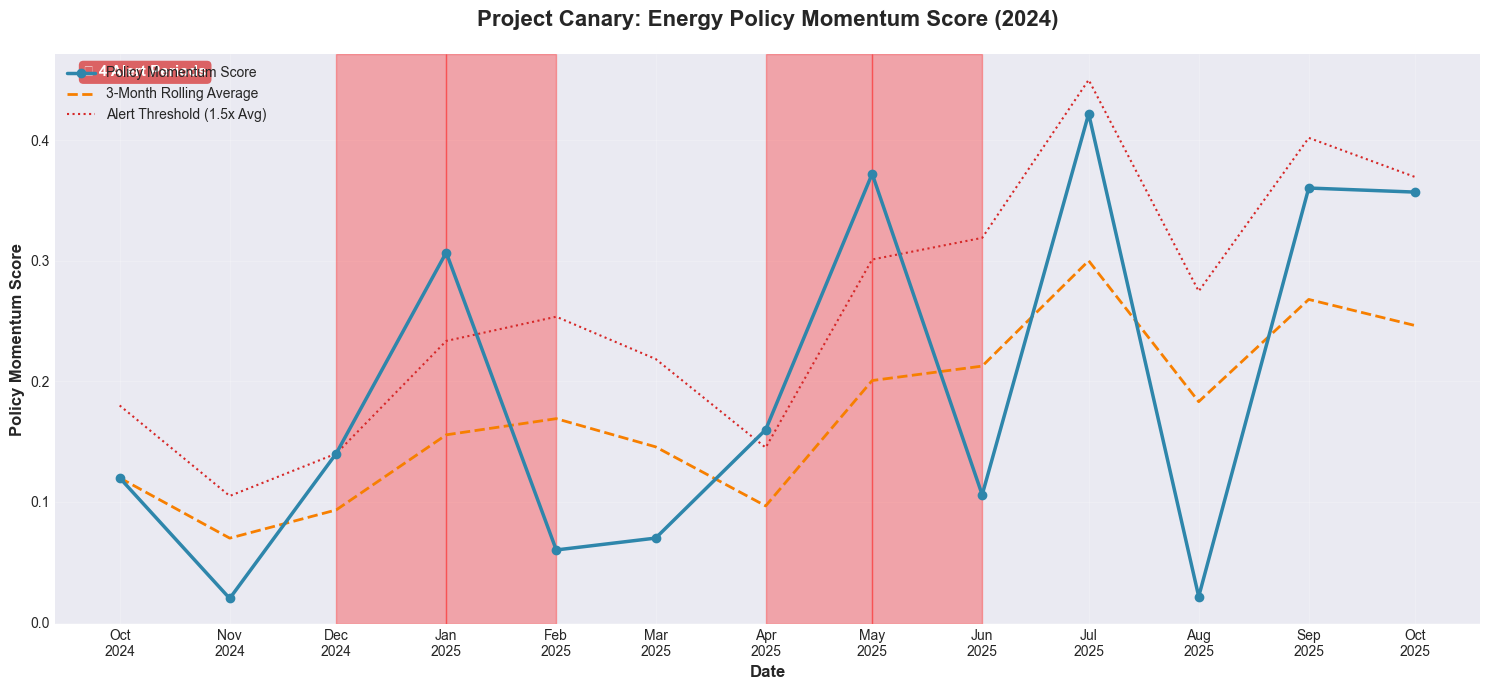


✓ Primary visualization complete


In [24]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Plot Policy Momentum Score
ax.plot(df['date'], df['policy_momentum_score'], 
        marker='o', linewidth=2.5, markersize=6, 
        color='#2E86AB', label='Policy Momentum Score', zorder=3)

# Plot rolling average
ax.plot(df['date'], df['rolling_avg_3m'], 
        linestyle='--', linewidth=2, 
        color='#F77F00', label='3-Month Rolling Average', zorder=2)

# Highlight alert periods with red shading
alert_periods = df[df['alert'] == True]
for idx, row in alert_periods.iterrows():
    # Shade the month where alert was triggered
    ax.axvspan(row['date'], row['date'] + pd.DateOffset(months=1), 
               alpha=0.3, color='red', zorder=1)

# Add threshold line (1.5x average for reference)
ax.plot(df['date'], df['rolling_avg_3m'] * 1.5, 
        linestyle=':', linewidth=1.5, 
        color='#D62828', label='Alert Threshold (1.5x Avg)', zorder=2)

# Formatting
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Policy Momentum Score', fontsize=12, fontweight='bold')
ax.set_title('Project Canary: Energy Policy Momentum Score (2024)', 
             fontsize=16, fontweight='bold', pad=20)

# Format x-axis to show months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Add grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Add legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.9)

# Add annotation for alert periods
if len(alert_periods) > 0:
    ax.text(0.02, 0.98, f'⚠ {len(alert_periods)} Alert Periods', 
            transform=ax.transAxes, fontsize=11, 
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='#D62828', alpha=0.7, edgecolor='none'),
            color='white', fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

print("\n✓ Primary visualization complete")

## 3. Component Breakdown Visualization

Show how each vector (Money, People, Paper) contributes to the overall momentum score.

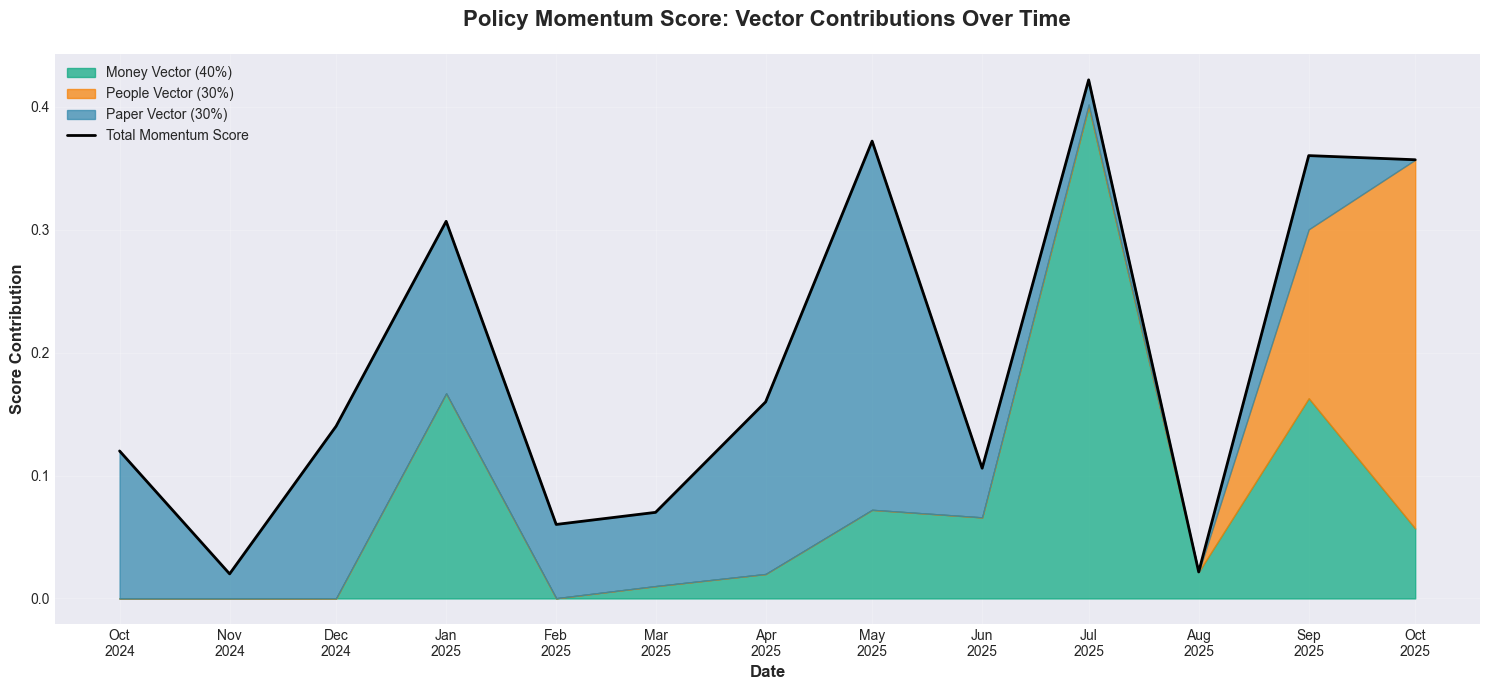


✓ Component breakdown visualization complete


In [25]:
# Create stacked area chart
fig, ax = plt.subplots(figsize=(15, 7))

# Calculate weighted contributions
df['money_contribution'] = df['money_norm'] * 0.4
df['people_contribution'] = df['people_norm'] * 0.3
df['paper_contribution'] = df['paper_norm'] * 0.3

# Create stacked area plot
ax.fill_between(df['date'], 0, df['money_contribution'], 
                label='Money Vector (40%)', alpha=0.7, color='#06A77D')
ax.fill_between(df['date'], df['money_contribution'], 
                df['money_contribution'] + df['people_contribution'],
                label='People Vector (30%)', alpha=0.7, color='#F77F00')
ax.fill_between(df['date'], 
                df['money_contribution'] + df['people_contribution'],
                df['policy_momentum_score'],
                label='Paper Vector (30%)', alpha=0.7, color='#2E86AB')

# Add total score line on top
ax.plot(df['date'], df['policy_momentum_score'], 
        linewidth=2, color='black', label='Total Momentum Score', zorder=3)

# Formatting
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Score Contribution', fontsize=12, fontweight='bold')
ax.set_title('Policy Momentum Score: Vector Contributions Over Time', 
             fontsize=16, fontweight='bold', pad=20)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Add grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Add legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.9)

# Adjust layout
plt.tight_layout()
plt.show()

print("\n✓ Component breakdown visualization complete")

## 4. Alert Analysis

Detailed breakdown of alert periods and their characteristics.

=== ALERT PERIOD ANALYSIS ===

Total alerts triggered: 4 months (30.8% of dataset)

Alert Details:
--------------------------------------------------------------------------------
Month: 2024-12
  Momentum Score: 0.140
  Rolling Average: 0.093
  Exceeded average by: 50.1%
  Money intensity: 0.000 | People: 0.000 | Paper: 0.467
--------------------------------------------------------------------------------
Month: 2025-01
  Momentum Score: 0.307
  Rolling Average: 0.156
  Exceeded average by: 97.1%
  Money intensity: 0.417 | People: 0.000 | Paper: 0.467
--------------------------------------------------------------------------------
Month: 2025-04
  Momentum Score: 0.160
  Rolling Average: 0.097
  Exceeded average by: 65.3%
  Money intensity: 0.050 | People: 0.000 | Paper: 0.467
--------------------------------------------------------------------------------
Month: 2025-05
  Momentum Score: 0.372
  Rolling Average: 0.201
  Exceeded average by: 85.4%
  Money intensity: 0.180 | People: 0.

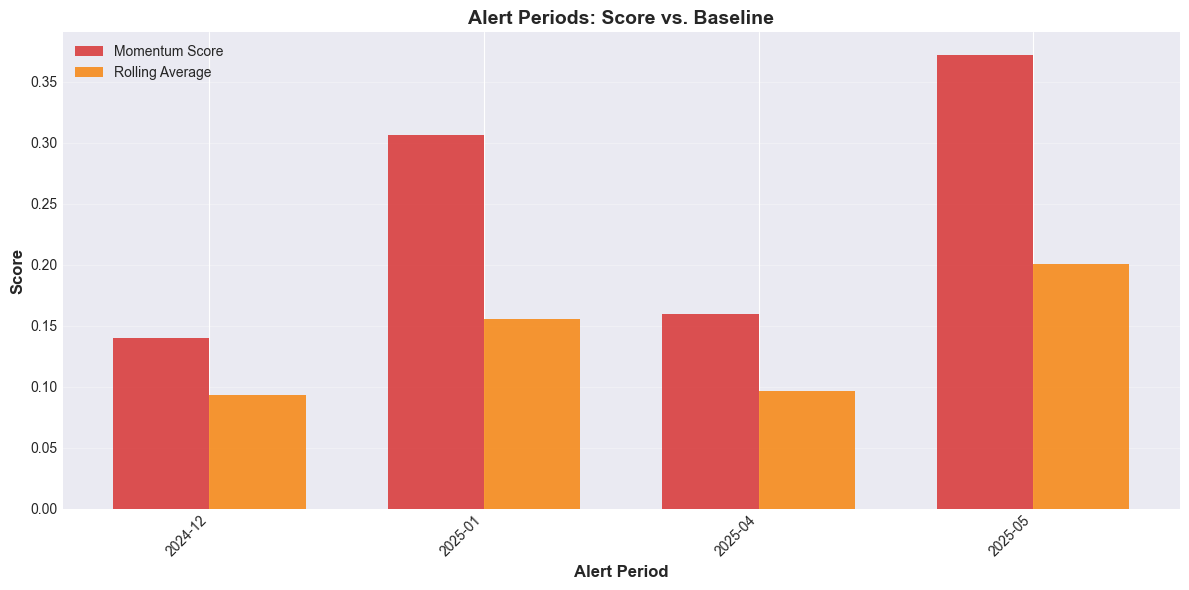

In [26]:
# Filter alert periods
alerts = df[df['alert'] == True].copy()

if len(alerts) > 0:
    print("=== ALERT PERIOD ANALYSIS ===")
    print(f"\nTotal alerts triggered: {len(alerts)} months ({len(alerts)/len(df)*100:.1f}% of dataset)\n")
    
    # Create alert summary table
    alerts['month'] = alerts['date'].dt.strftime('%Y-%m')
    alerts['score_vs_avg'] = ((alerts['policy_momentum_score'] / alerts['rolling_avg_3m'] - 1) * 100).round(1)
    
    print("Alert Details:")
    print("-" * 80)
    
    for idx, row in alerts.iterrows():
        print(f"Month: {row['month']}")
        print(f"  Momentum Score: {row['policy_momentum_score']:.3f}")
        print(f"  Rolling Average: {row['rolling_avg_3m']:.3f}")
        print(f"  Exceeded average by: {row['score_vs_avg']:.1f}%")
        print(f"  Money intensity: {row['money_norm']:.3f} | People: {row['people_norm']:.3f} | Paper: {row['paper_norm']:.3f}")
        print("-" * 80)
    
    # Create bar chart of alert periods
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = range(len(alerts))
    width = 0.35
    
    ax.bar([i - width/2 for i in x], alerts['policy_momentum_score'], 
           width, label='Momentum Score', color='#D62828', alpha=0.8)
    ax.bar([i + width/2 for i in x], alerts['rolling_avg_3m'], 
           width, label='Rolling Average', color='#F77F00', alpha=0.8)
    
    ax.set_xlabel('Alert Period', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title('Alert Periods: Score vs. Baseline', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(alerts['month'], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No alert periods detected in this dataset.")
    print("This could mean: momentum is growing steadily without acceleration spikes,")
    print("or the alert threshold (1.5x) may need adjustment.")

## 5. Dashboard Preview

Create a summary dashboard-style view showing key metrics and trends.

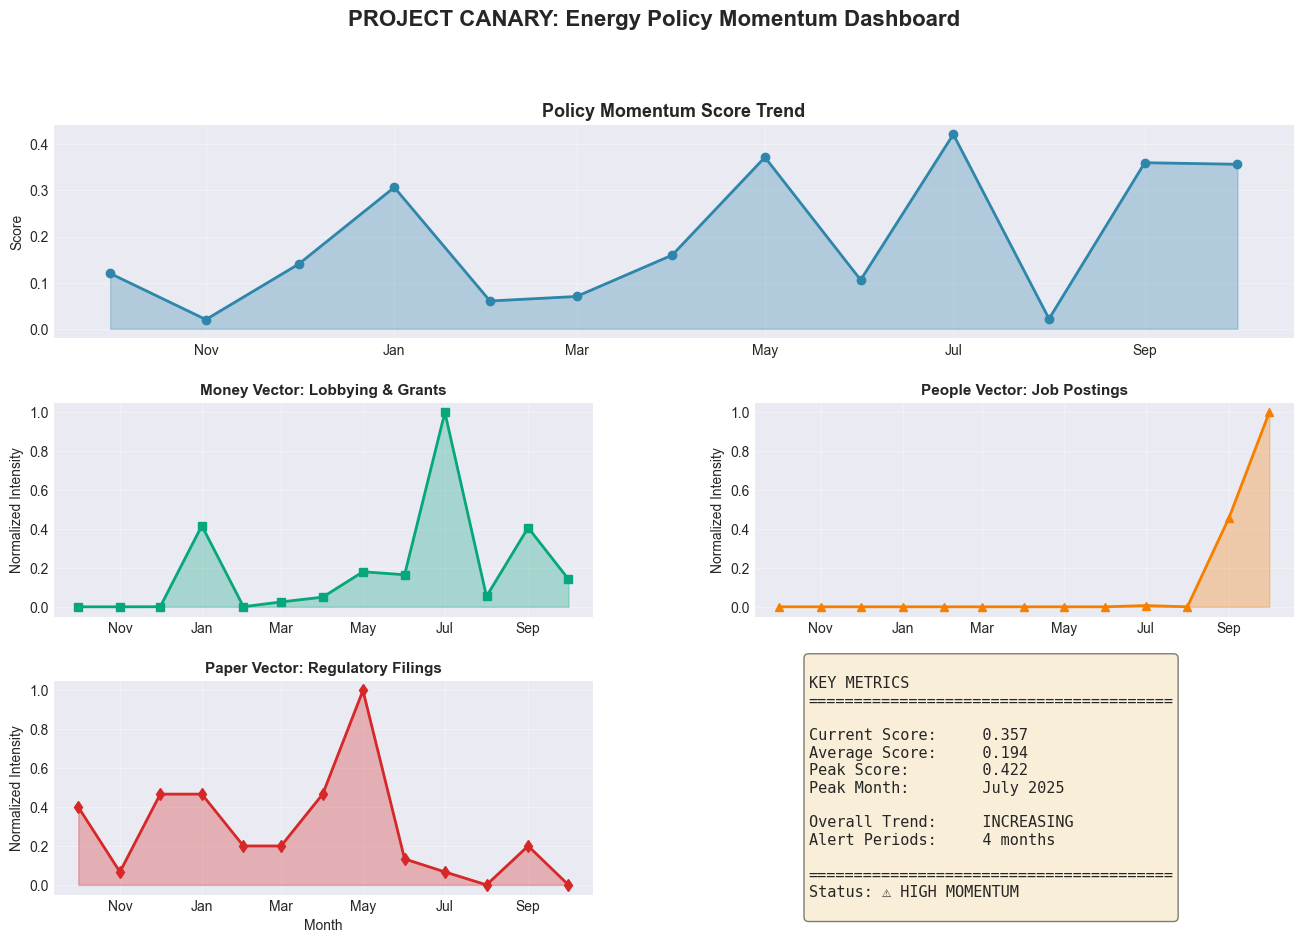


✓ Dashboard preview generated


In [27]:
# Create dashboard with multiple subplots
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Main momentum score (top, spanning both columns)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df['date'], df['policy_momentum_score'], marker='o', linewidth=2, color='#2E86AB')
ax1.fill_between(df['date'], 0, df['policy_momentum_score'], alpha=0.3, color='#2E86AB')
ax1.set_title('Policy Momentum Score Trend', fontsize=13, fontweight='bold')
ax1.set_ylabel('Score')
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# 2. Money vector (middle left)
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(df['date'], df['money_norm'], marker='s', linewidth=2, color='#06A77D')
ax2.fill_between(df['date'], 0, df['money_norm'], alpha=0.3, color='#06A77D')
ax2.set_title('Money Vector: Lobbying & Grants', fontsize=11, fontweight='bold')
ax2.set_ylabel('Normalized Intensity')
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# 3. People vector (middle right)
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(df['date'], df['people_norm'], marker='^', linewidth=2, color='#F77F00')
ax3.fill_between(df['date'], 0, df['people_norm'], alpha=0.3, color='#F77F00')
ax3.set_title('People Vector: Job Postings', fontsize=11, fontweight='bold')
ax3.set_ylabel('Normalized Intensity')
ax3.grid(True, alpha=0.3)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# 4. Paper vector (bottom left)
ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(df['date'], df['paper_norm'], marker='d', linewidth=2, color='#D62828')
ax4.fill_between(df['date'], 0, df['paper_norm'], alpha=0.3, color='#D62828')
ax4.set_title('Paper Vector: Regulatory Filings', fontsize=11, fontweight='bold')
ax4.set_ylabel('Normalized Intensity')
ax4.set_xlabel('Month')
ax4.grid(True, alpha=0.3)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# 5. Summary statistics (bottom right)
ax5 = fig.add_subplot(gs[2, 1])
ax5.axis('off')

# Calculate key metrics
current_score = df['policy_momentum_score'].iloc[-1]
avg_score = df['policy_momentum_score'].mean()
max_score = df['policy_momentum_score'].max()
max_month = df.loc[df['policy_momentum_score'].idxmax(), 'date'].strftime('%B %Y')
trend = 'INCREASING' if df['policy_momentum_score'].iloc[-1] > df['policy_momentum_score'].iloc[0] else 'DECREASING'
alert_count = df['alert'].sum()

summary_text = f"""
KEY METRICS
{'='*40}

Current Score:     {current_score:.3f}
Average Score:     {avg_score:.3f}
Peak Score:        {max_score:.3f}
Peak Month:        {max_month}

Overall Trend:     {trend}
Alert Periods:     {alert_count} months

{'='*40}
Status: {'⚠ HIGH MOMENTUM' if current_score > avg_score * 1.3 else '✓ Normal Activity'}
"""

ax5.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
         verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Main title
fig.suptitle('PROJECT CANARY: Energy Policy Momentum Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)

plt.show()

print("\n✓ Dashboard preview generated")

## 6. Future Dashboard Integration

This analysis demonstrates how the Policy Momentum Score can be integrated into a live dashboard:

### Recommended Next Steps:
1. **Real-time Data Pipeline**: Automate data collection from lobbying databases, job boards, and regulatory APIs
2. **Interactive Dashboard**: Build with tools like Plotly Dash, Streamlit, or Tableau for real-time monitoring
3. **Alert System**: Set up email/Slack notifications when momentum scores trigger alerts
4. **Drill-down Capability**: Enable users to click on alert periods and see underlying data (specific filings, companies, etc.)
5. **Topic Segmentation**: Separate scores by policy topic (battery storage, renewables, data centers)
6. **Predictive Modeling**: Add ML models to forecast momentum trends 3-6 months ahead
7. **Comparative Analysis**: Track multiple policy topics simultaneously and compare momentum

### Technical Implementation:
- **Data Storage**: PostgreSQL or cloud data warehouse for historical data
- **ETL Pipeline**: Apache Airflow or cloud functions for automated data updates
- **Dashboard**: React + D3.js or Python dashboard frameworks
- **Deployment**: Docker containers on AWS/GCP/Azure with auto-scaling

### Business Value:
- **Early Warning System**: Detect emerging policy trends 6-12 months before they become mainstream
- **Investment Intelligence**: Guide strategic investments in energy sectors with growing policy support
- **Risk Management**: Identify policy headwinds before they impact operations
- **Competitive Advantage**: Stay ahead of competitors by acting on early signals

In [28]:
print("="*60)
print("PROJECT CANARY: ANALYSIS & SCORING COMPLETE")
print("="*60)
print(f"\n✓ Analyzed {len(df)} months of energy policy data")
print(f"✓ Identified {alert_count} high-momentum periods")
print(f"✓ Integrated 3 data vectors: Money, People, Paper")
print(f"\nCurrent momentum: {current_score:.3f} (Avg: {avg_score:.3f})")
print(f"Overall trend: {trend}")
print("\nReady for dashboard deployment! 🚀")
print("="*60)

PROJECT CANARY: ANALYSIS & SCORING COMPLETE

✓ Analyzed 13 months of energy policy data
✓ Identified 4 high-momentum periods
✓ Integrated 3 data vectors: Money, People, Paper

Current momentum: 0.357 (Avg: 0.194)
Overall trend: INCREASING

Ready for dashboard deployment! 🚀
